In [28]:
using Symbolics
using CairoMakie
set_theme!(theme_minimal())

@variables γ M₁

ρ = Symbolics.variables(:ρ, 1:2)
p = Symbolics.variables(:p, 1:2)
α = p ./ ρ.^γ

rules = Dict(
    ρ[2] => (γ + 1) / (γ - 1 + 2 / M₁^2) * ρ[1],
    p[2] => (2 * γ * M₁^2 - (γ - 1)) / (γ + 1) * p[1]
)
ratio = substitute(α[2]/α[1], rules) |> simplify_fractions
r = @rule (~x * ~y)^(~z) => (~x)^(~z) * (~y)^(~z)
ratio = simplify(ratio, RuleSet([r]))
display(ratio)

D = Differential(M₁^2)
d = D(ratio) |> expand_derivatives

((1 - γ + 2(M₁^2)*γ)*((2 - (M₁^2) + (M₁^2)*γ)^γ)) / ((M₁^(2γ))*((1 + γ)^γ)*(1 + γ))

(2((2 - (M₁^2) + (M₁^2)*γ)^γ)*γ + (1 - γ + 2(M₁^2)*γ)*((2 - (M₁^2) + (M₁^2)*γ)^(-1 + γ))*γ*(-1 + γ)) / ((M₁^(2γ))*((1 + γ)^γ)*(1 + γ))

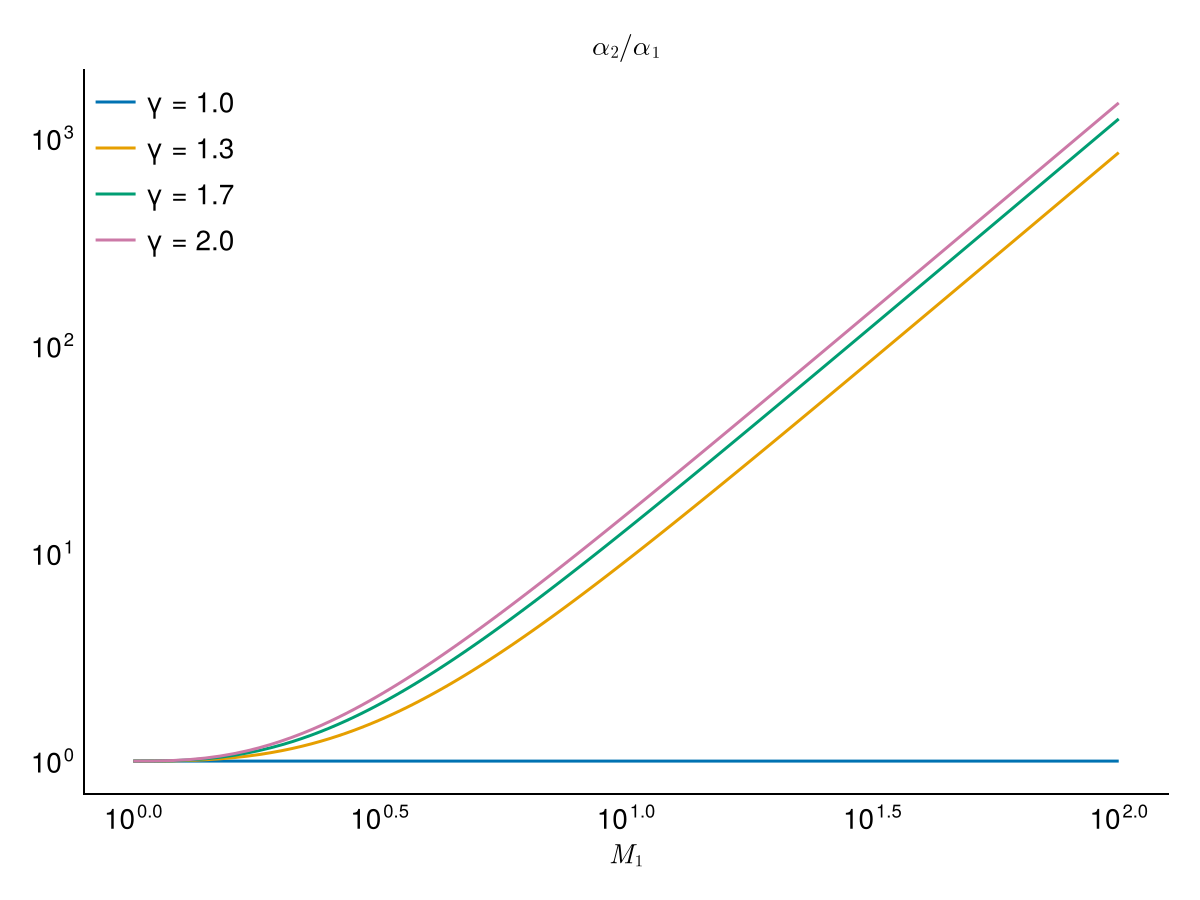

In [22]:
γs = [1, 4/3, 5/3, 2]
y_funcs = map(γs) do γ_temp
    temp_ratio = substitute(ratio, Dict(γ => γ_temp))
    build_function(temp_ratio, M₁) |> eval
end

f = Figure()
axis = Axis(f[1, 1];
    title = L"α_2/α_1", xlabel = L"M_1",
    xscale=log10, yscale=log10
)
x =  1:0.1:100
map(y_funcs, γs) do y_func, γ_temp
    lines!(x, y_func, label = "γ = $(round(γ_temp; digits=1))")
end
axislegend(; position = :lt)
f